Primero se importan las librerias necesarias

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras_preprocessing.image.utils import load_img
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from tensorflow.keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
print("Num GPUs Available: ", tf.config.experimental.list_physical_devices('GPU'))
model = load_model('vgg16_animal_classification.h5')
class_names=['Bear', 'Camel', 'Cattle', 'Chicken',  'Deer', 'Duck', 'Eagle', 'Elephant', 'Fox', 'Frog', 'Giraffe', 'Goldfish', 'Hedgehog', 'Hippopotamus', 'Horse', 'Jaguar', 'Kangaroo', 'Koala', 'Lion', 'Lizard', 'Lynx', 'Magpie', 'Monkey', 'Ostrich', 'Otter', 'Owl', 'Panda', 'Parrot', 'Penguin', 'Polar bear', 'Rabbit', 'Raccoon', 'Red panda', 'Rhinoceros', 'Sheep', 'Snake', 'Sparrow', 'Squirrel', 'Swan', 'Tiger', 'Turkey', 'Turtle', 'Woodpecker', 'Zebra']
num_classes = len(class_names)

Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


En esta parte se predice una imagen especifica

In [2]:
img = image.load_img('datos_nuevos/1-3.jpg', target_size=(255,255))
x = img_to_array(img)
print(x.shape)
x=x/255
x = x.reshape((1,) + x.shape)
prediction= model.predict(x)
#print(prediction)
suma=0
porcentaje=[]
acertado=False
for a in prediction[0]:
    porcentaje.append(a*100)
    suma+=a
    if(a>0.5):
        acertado=True
#print(suma)
#print(porcentaje)
if(acertado):
    pred = np.argmax(prediction,axis=1)
    print(class_names[pred[0]])
else:
    pred=-1
    print("No puede predecir")


(255, 255, 3)
Parrot


En esta parte se carga un dataset de test entero y se saca el porcentaje de acierto total

In [3]:
test_ds = keras.utils.image_dataset_from_directory(
    directory='datos_nuevos/test/',
    label_mode='int',
    batch_size=1,
    image_size=(255, 255))

sns.set_style('darkgrid')
ytrue=[]
ypred=[]
preds=[]
for images, label in test_ds:
    img=images/255
    pred=model.predict(img, verbose=0)
    preds.append(pred)
    for e in label:
        ytrue.append(class_names[e]) # list of class names associated with each image file in test dataset 

errors=0
count=0

for i, p in enumerate(preds):
    count +=1
    index=np.argmax(p) # get index of prediction with highest probability
    klass=class_names[index] 
    ypred.append(klass)  
    if klass != ytrue[i]:
        errors +=1
acc= (count-errors)* 100/count
msg=f'there were {count-errors} correct predictions in {count} tests for an accuracy of {acc:6.2f} % '
print(msg) 


Found 2200 files belonging to 44 classes.
there were 1643 correct predictions in 2200 tests for an accuracy of  74.68 % 


Aqui se consigue el porcentaje de acierto de cada clase y la matriz de confusion. Se han usado estos datos para quitar clases con mala precision y unir clases que eran parecidos y el modelo confundiese. Aun se puede ver que sigue confundiendo especies parecidas como los patos y cisnes y monos y koalas.

Bear: 56.0
Camel: 68.0
Cattle: 72.0
Chicken: 86.0
Deer: 76.0
Duck: 82.0
Eagle: 96.0
Elephant: 82.0
Fox: 66.0
Frog: 84.0
Giraffe: 86.0
Goldfish: 58.0
Hedgehog: 94.0
Hippopotamus: 50.0
Horse: 72.0
Jaguar: 82.0
Kangaroo: 50.0
Koala: 64.0
Lion: 74.0
Lizard: 88.0
Lynx: 60.0
Magpie: 76.0
Monkey: 94.0
Ostrich: 78.0
Otter: 54.0
Owl: 80.0
Panda: 78.0
Parrot: 88.0
Penguin: 86.0
Polar bear: 76.0
Rabbit: 80.0
Raccoon: 72.0
Red panda: 74.0
Rhinoceros: 76.0
Sheep: 66.0
Snake: 86.0
Sparrow: 94.0
Squirrel: 56.0
Swan: 80.0
Tiger: 90.0
Turkey: 30.0
Turtle: 56.0
Woodpecker: 80.0
Zebra: 90.0


Text(0.5, 1.0, 'Confusion Matrix')

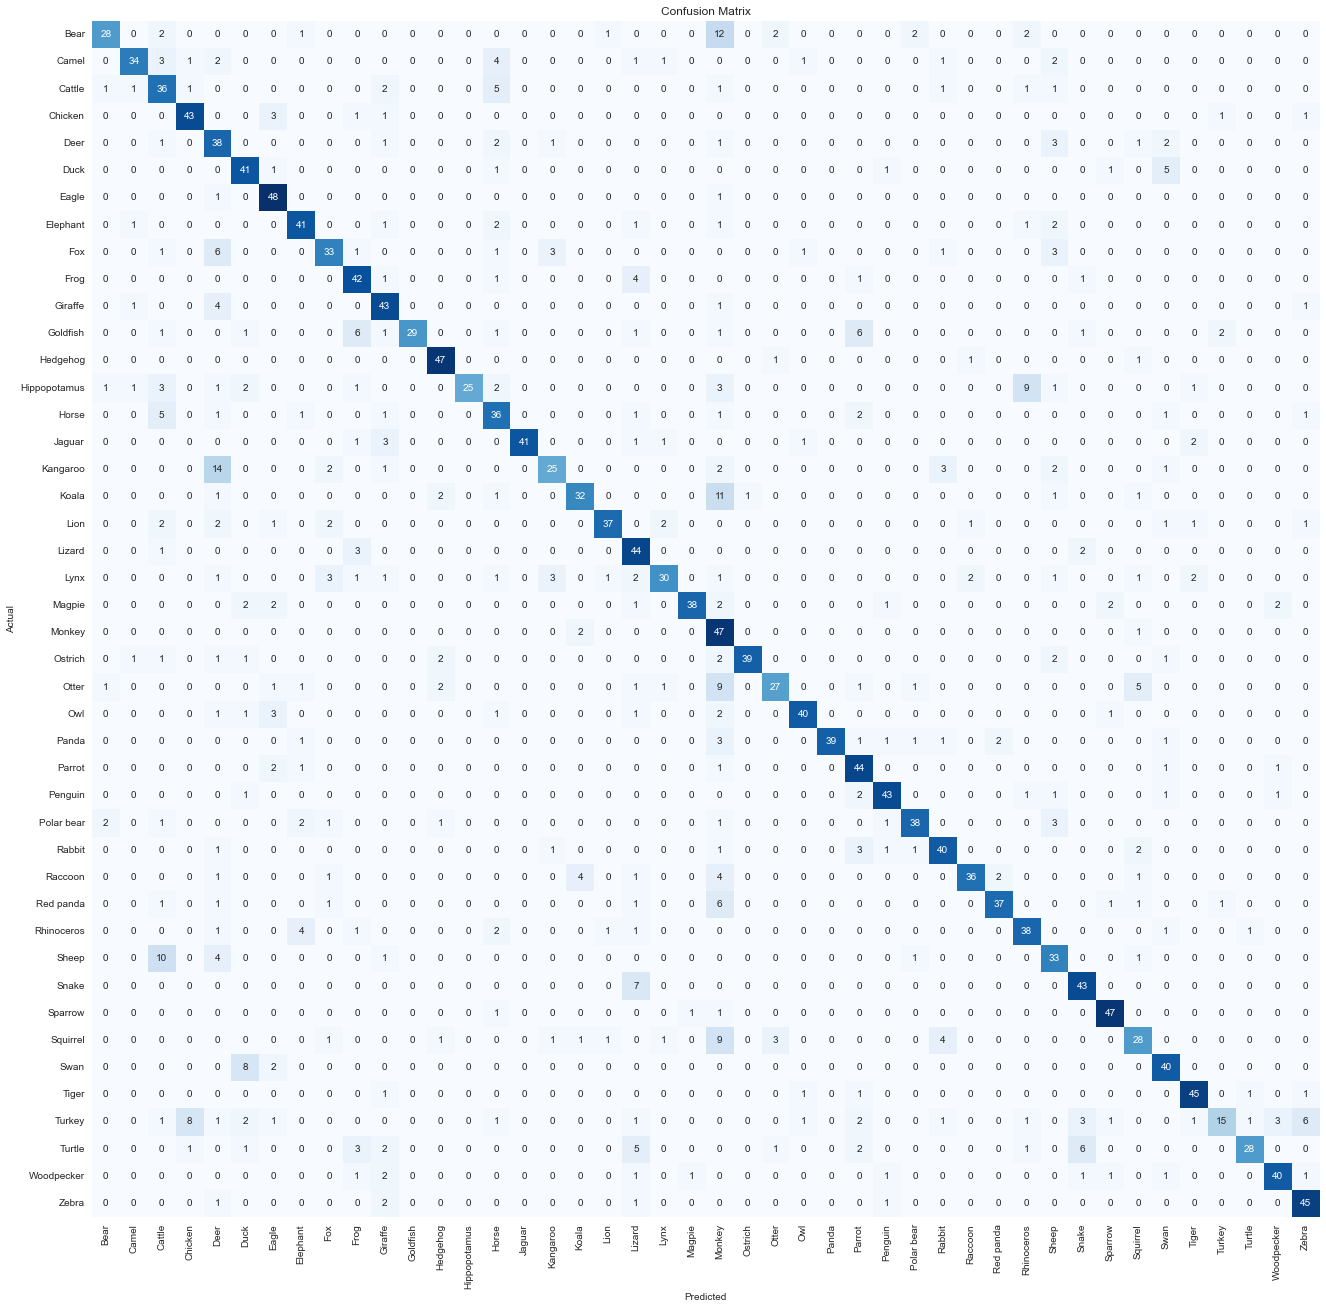

In [6]:
for i in range(0,len(class_names)):
    total=0
    acertados=0
    for a,t in enumerate(ytrue):
        if(t==class_names[i]):
            total+=1
            if(ypred[a]==t):
                acertados+=1
    print('{}: {}'.format(class_names[i],(acertados* 100/total)))
ypred=np.array(ypred)
ytrue=np.array(ytrue)

# create a confusion matrix 
cm = confusion_matrix(ytrue, ypred)        
length=num_classes
if length<8:
    fig_width=8
    fig_height=8
else:
    fig_width= int(length * .5)
    fig_height= int(length * .5)
plt.figure(figsize=(fig_width, fig_height))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
plt.xticks(np.arange(length)+.5, class_names, rotation= 90)
plt.yticks(np.arange(length)+.5, class_names, rotation=0)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")